In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the saved model
model = load_model('autoencoder_model(keras).keras')

C:\Users\Sourish\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
df_t = pd.read_csv("df_test.csv")

In [4]:
df_t.head()

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,...,Length,Type of position fixing device,Draught,Destination,ETA,Data source type,A,B,C,D
0,27/02/2024 03:42:19,Class A,266163000,57.037450,12.157890,Unknown value,NaN,3.1,141.4,NaN,...,17.0,GPS,NaN,Unknown,NaN,AIS,5.0,12.0,3.0,3.0
1,27/02/2024 07:56:43,Class A,211493380,54.684170,8.616163,Under way using engine,0.0,10.2,212.6,208.0,...,76.0,GPS,1.7,WYK/DAGEBUELL/AMRUM,09/07/2024 22:00:00,AIS,38.0,38.0,8.0,8.0
2,27/02/2024 22:03:56,Class A,218143000,54.537913,11.199627,Under way using engine,0.0,0.0,242.0,124.0,...,38.0,GPS,6.0,ETV FEHMARNBELT,31/01/2025 12:00:00,AIS,15.0,23.0,6.0,6.0
3,27/02/2024 17:22:33,Class A,219014162,57.122442,8.600523,Engaged in fishing,0.0,0.0,176.9,147.0,...,10.0,GPS,1.4,VIGSOE,01/01/2025 00:00:00,AIS,4.0,6.0,2.0,2.0
4,27/02/2024 18:15:21,Class A,538010661,55.530500,5.007167,Restricted maneuverability,NaN,0.0,355.0,NaN,...,103.0,GPS,12.3,FREDERIKSHAVN,04/03/2024 04:00:00,AIS,38.0,65.0,40.0,28.0


In [5]:
null_counts = df_t.isna().sum()
print(null_counts)

# Timestamp                        0
Type of mobile                     0
MMSI                               0
Latitude                           0
Longitude                          0
Navigational status                0
ROT                               25
SOG                                5
COG                                7
Heading                           15
IMO                                0
Callsign                           0
Name                               5
Ship type                          0
Cargo type                        78
Width                              6
Length                             6
Type of position fixing device     0
Draught                           16
Destination                        0
ETA                               27
Data source type                   0
A                                  6
B                                  7
C                                  6
D                                  7
dtype: int64


In [6]:
df_t['# Timestamp'] = df_t['# Timestamp'].astype('datetime64[ns]').astype(np.int64) / 1e9  # Convert to seconds

In [7]:
df_test = pd.DataFrame(df_t, columns=["# Timestamp", "MMSI", "Latitude", "Longitude", "SOG", "COG", "Heading"])

In [8]:
df_test.head()

,# Timestamp,MMSI,Latitude,Longitude,SOG,COG,Heading
0,1.709005e+09,266163000,57.037450,12.157890,3.1,141.4,NaN
1,1.709021e+09,211493380,54.684170,8.616163,10.2,212.6,208.0
2,1.709071e+09,218143000,54.537913,11.199627,0.0,242.0,124.0
3,1.709055e+09,219014162,57.122442,8.600523,0.0,176.9,147.0
4,1.709058e+09,538010661,55.530500,5.007167,0.0,355.0,NaN


In [9]:
df_test = df_test.dropna()

In [10]:
null_counts = df_test.isna().sum()
print(null_counts)

# Timestamp    0
MMSI           0
Latitude       0
Longitude      0
SOG            0
COG            0
Heading        0
dtype: int64


In [11]:
df_test.shape

(85, 7)

In [12]:
scaler = StandardScaler()
df_features_normalized = scaler.fit_transform(df_test)

In [13]:
# Step 2: Calculate reconstruction error for the test data
reconstructions = model.predict(df_features_normalized)
reconstruction_errors = np.mean(np.abs(df_features_normalized - reconstructions), axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [14]:
# Step 3: Determine if each test sample is an anomaly
threshold = 1 # Example: using the 95th percentile threshold
anomalies = reconstruction_errors > threshold

In [15]:
for i, (error, is_anomaly) in enumerate(zip(reconstruction_errors, anomalies)):
    if is_anomaly:
        base_date_time = df_test['# Timestamp'].iloc[i]
        mmsi = df_test['MMSI'].iloc[i]
        lat = df_test['Latitude'].iloc[i]
        lon = df_test['Longitude'].iloc[i]
        print(f"Anomaly detected at Data Point {i}:")
        print(f"Timestamp = {base_date_time}, MMSI = {mmsi}, LAT = {lat}, LON = {lon}")
        print(f"Reconstruction Error = {error:.2f}\n")
    else:
        print(f"Data Point {i}: No anomaly detected, Reconstruction Error = {error:.2f}")

Data Point 0: No anomaly detected, Reconstruction Error = 0.51
Data Point 1: No anomaly detected, Reconstruction Error = 0.58
Data Point 2: No anomaly detected, Reconstruction Error = 0.47
Data Point 3: No anomaly detected, Reconstruction Error = 0.49
Data Point 4: No anomaly detected, Reconstruction Error = 0.89
Data Point 5: No anomaly detected, Reconstruction Error = 0.59
Data Point 6: No anomaly detected, Reconstruction Error = 0.33
Data Point 7: No anomaly detected, Reconstruction Error = 0.52
Data Point 8: No anomaly detected, Reconstruction Error = 0.56
Data Point 9: No anomaly detected, Reconstruction Error = 0.33
Data Point 10: No anomaly detected, Reconstruction Error = 0.25
Data Point 11: No anomaly detected, Reconstruction Error = 0.44
Data Point 12: No anomaly detected, Reconstruction Error = 0.29
Data Point 13: No anomaly detected, Reconstruction Error = 0.68
Data Point 14: No anomaly detected, Reconstruction Error = 0.35
Data Point 15: No anomaly detected, Reconstruction

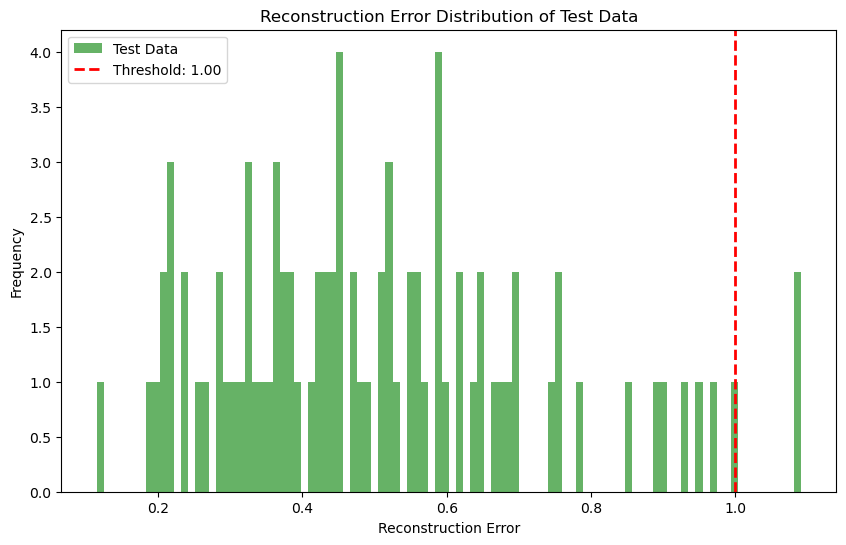

In [16]:
# Visualize the results if needed
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors, bins=100, alpha=0.6, color='g', label='Test Data')
plt.axvline(x=threshold, color='r', linestyle='dashed', linewidth=2, label=f'Threshold: {threshold:.2f}')
plt.title('Reconstruction Error Distribution of Test Data')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()